# Лабораторная работа 3
Деревья решений. Ансамбли решающих деревьев.

## Инициализация

### Скачивание пакетов

In [ ]:
%pip install scikit-learn
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install xgboost

### Импорт пакетов

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

### Убираем предупреждения

In [3]:
warnings.filterwarnings('ignore')

## Часть 1

### Выбрать подходящую таблицу данных.

In [4]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.Series(data.target, name="class")
df.insert(0, 'class', target)
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Построить и визуализировать дерево решений.

#### Критерий Джини
$$G = 1 - p_k^2,$$
где $p_k$ — доля объектов принадлежащих $k$-классу.

#### Код

|--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- alcohol <= 13.14
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.14
|   |   |   |   |--- class: 0
|   |   |--- proline >  724.50
|   |   |   |--- class: 0



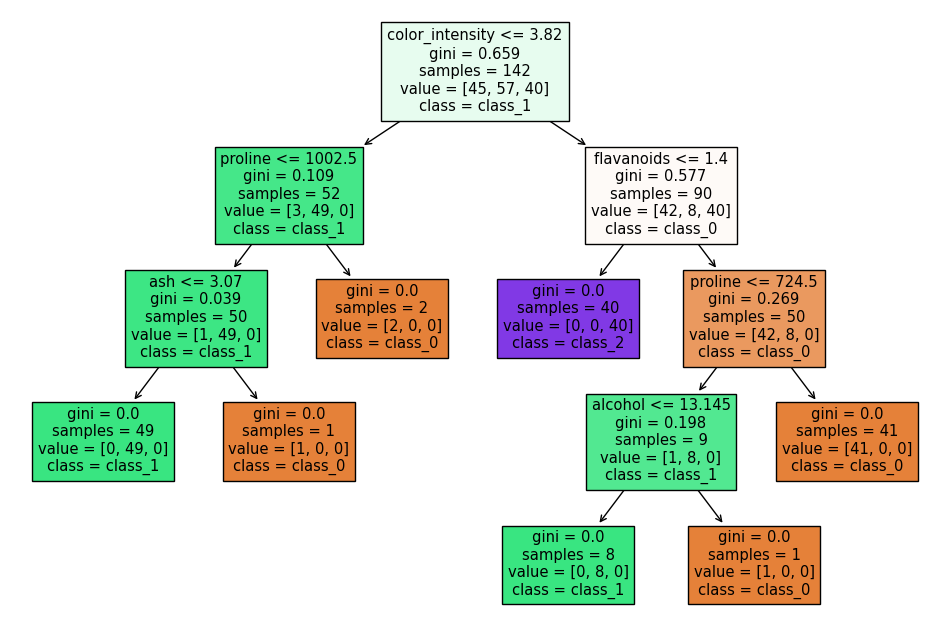

In [6]:
# Разделение данных на обучающий и тестовый наборы
X, y = df.drop('class', axis=1), df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение дерева решений
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Визуализация дерева решений в виде текста
tree_rules = export_text(tree_model, feature_names=data.feature_names)
print(tree_rules)

# Графическая визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

## Часть 2

### Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.

#### F score

Precision – не прихватить лишнее. Recall – не пропустить нужное.

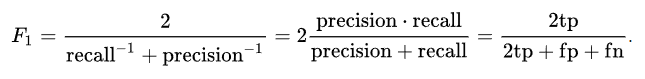

#### Значения в дереве решений

В стандартном бинарном дереве решений, таком как то, которое создает XGBoost, присутствуют узлы, такие как:

1. Внутренние узлы:

- Они имеют условие (например, "если признак X меньше 5").
- yes: Если условие истинно, модель идет вправо (yes).
- no: Если условие ложно, модель идет влево (no).

2. Листовые узлы:

- Они не имеют условия.
- Вместо этого они содержат значение, которое представляет прогноз модели в этой точке дерева.

3. Отсутствующие значения (missing):

- Это может быть часть условия в узле.
- Если значение признака отсутствует (например, если данных нет для данного наблюдения), модель может решить следовать по другому пути, отличному от yes или no.

#### Код

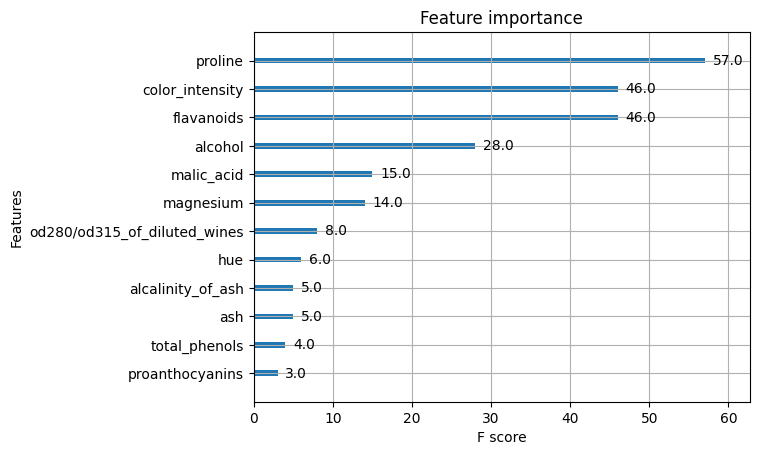

Tree 1:
0:[proline<760] yes=1,no=2,missing=2
	1:[ash<2.79999995] yes=3,no=4,missing=4
		3:leaf=-0.21191138
		4:leaf=-7.66345476e-09
	2:[flavanoids<2.36999989] yes=5,no=6,missing=6
		5:[alcohol<12.5100002] yes=7,no=8,missing=8
			7:leaf=-0.155172437
			8:leaf=-7.66345476e-09
		6:[alcohol<13.0299997] yes=9,no=10,missing=10
			9:leaf=0.128571421
			10:leaf=0.426035523

Tree 2:
0:[color_intensity<3.83999991] yes=1,no=2,missing=2
	1:[proline<970] yes=3,no=4,missing=4
		3:[ash<2.75] yes=7,no=8,missing=8
			7:leaf=0.429015547
			8:leaf=0.128571421
		4:leaf=-7.66345476e-09
	2:[proline<466] yes=5,no=6,missing=6
		5:[alcohol<12.6700001] yes=9,no=10,missing=10
			9:leaf=0.288000017
			10:leaf=-7.66345476e-09
		6:[magnesium<89] yes=11,no=12,missing=12
			11:[flavanoids<0.99000001] yes=13,no=14,missing=14
				13:leaf=-0.163636371
				14:leaf=0.257142842
			12:leaf=-0.218360677

Tree 3:
0:[od280/od315_of_diluted_wines<2.23000002] yes=1,no=2,missing=2
	1:[color_intensity<3.83999991] yes=3,no=4,missin

In [7]:
# Построение модели градиентного бустинга
boost_model = XGBClassifier()
boost_model.fit(X_train, y_train)

# Вывод значимости переменных
plot_importance(boost_model)
plt.show()

# Вывод списка построенных деревьев
trees = boost_model.get_booster().get_dump()
for i, tree in enumerate(trees):
    print(f"Tree {i+1}:\n{tree}")
    if i == 9:
        break

## Часть 3

### Построить зависимость качества решения (на обучении (решили потом что на тесте) и скользящем контроле) от числа вершин дерева.

**Скользящий контроль (cross-validation)** - это метод оценки производительности модели машинного обучения, который помогает бороться с проблемой переобучения и более объективно оценивать ее способность обобщения на новые данные. Вместо однократного разделения данных на обучающий и тестовый наборы, используемых только один раз, скользящий контроль проводит несколько таких разделений, каждый раз используя разные части данных для обучения и тестирования.

Один из самых распространенных методов скользящего контроля - это **k-кратная кросс-валидация (k-fold cross-validation)**. Процесс выглядит следующим образом:

1. Данные разбиваются на k подмножеств (фолдов).
2. Модель обучается k раз, каждый раз на k-1 подмножестве данных, а затем тестируется на оставшемся подмножестве.
3. Это повторяется k раз, каждый раз с использованием другого подмножества в качестве тестового.
4. Итоговая производительность модели вычисляется как среднее или сумма производительности во всех k тестах.

Таким образом, скользящий контроль позволяет использовать весь набор данных как для обучения, так и для тестирования модели, и усреднять результаты, что обеспечивает более стабильную оценку производительности модели.

#### Код

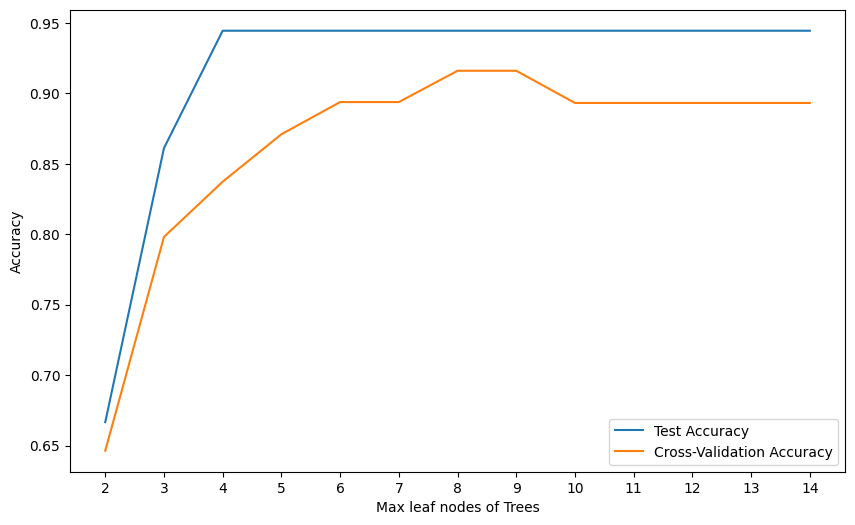

In [144]:
# Создание списков для сохранения результатов
test_scores = []
cv_scores = []

# Исследование зависимости от числа листьев дерева
max_leaf_nodes = np.arange(2, 15)
for leafs in max_leaf_nodes:
    # Построение дерева решений
    model = DecisionTreeClassifier(max_leaf_nodes=leafs, random_state=45)
    model.fit(X_train, y_train)

    # Вычисление точности на тестовом наборе
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_scores.append(test_accuracy)

    # Вычисление точности на скользящем контроле (cross-validation)
    cv_accuracy = cross_val_score(model, X, y, cv=5).mean()
    cv_scores.append(cv_accuracy)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(max_leaf_nodes, test_scores, label='Test Accuracy')
plt.plot(max_leaf_nodes, cv_scores, label='Cross-Validation Accuracy')
plt.xticks(max_leaf_nodes)
plt.xlabel('Max leaf nodes of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Часть 4

### Для метода градиентного бустинга построить зависимость качества решения (на обучении (на тесте) и скользящем контроле) от числа деревьев.
Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров.


#### Код

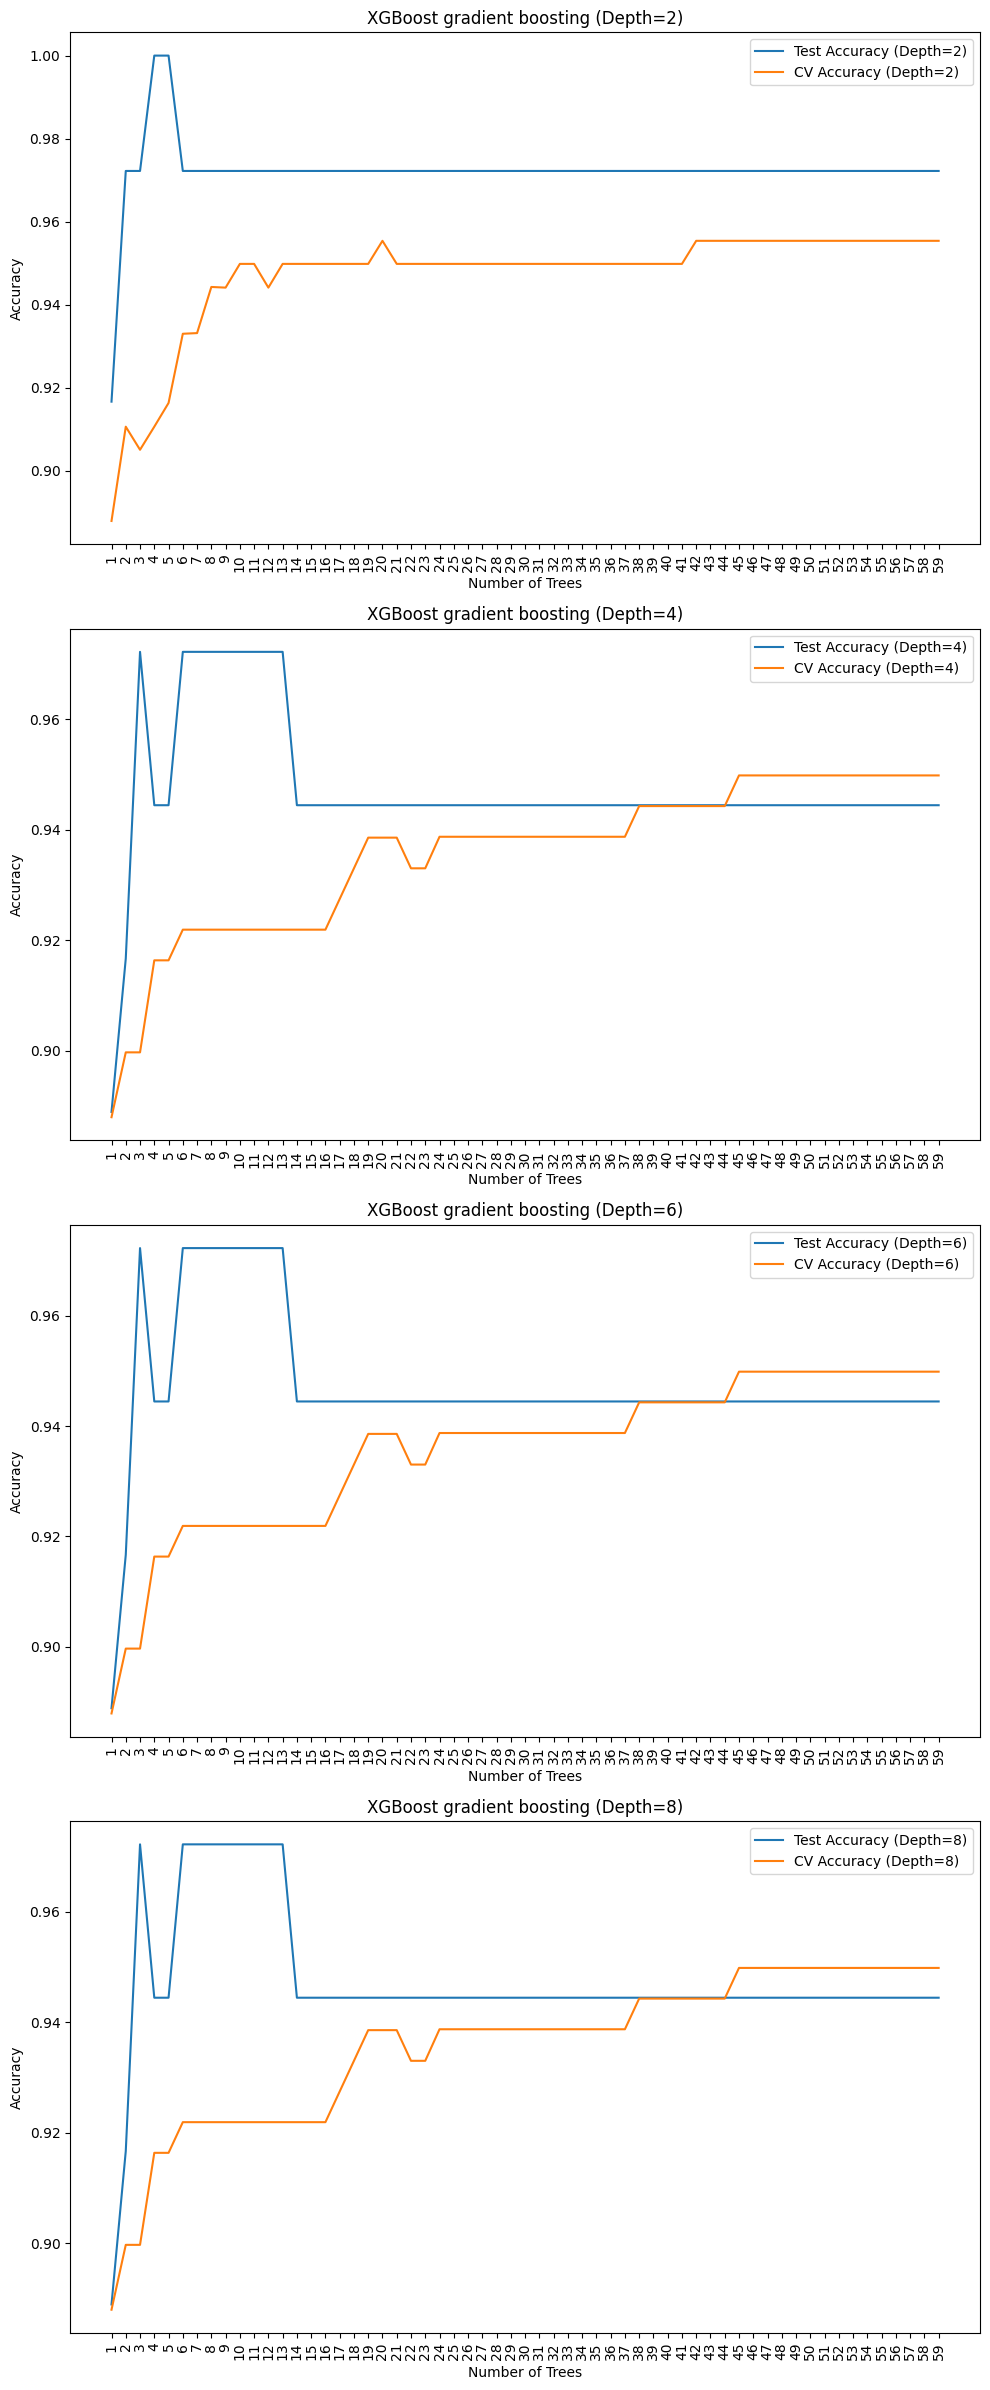

In [142]:
# Исследование зависимости от числа деревьев и глубины дерева
max_depth = [2, 4, 6, 8]
n_estimators_list = range(1, 60)

# Создаем subplot для каждой глубины дерева
fig, axes = plt.subplots(nrows=len(max_depth), ncols=1, figsize=(10, 6 * len(max_depth)))

for i, depth in enumerate(max_depth):
    test_scores_depth = []
    cv_scores_depth = []

    for n_estimators in n_estimators_list:
        # Создание и обучение модели градиентного бустинга
        model = XGBClassifier(max_depth=depth, n_estimators=n_estimators, random_state=45)
        model.fit(X_train, y_train)

        # Вычисление точности на тестовом наборе
        test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_scores_depth.append(test_accuracy)

        # Вычисление точности на скользящем контроле (cross-validation)
        cv_accuracy = cross_val_score(model, X, y, cv=5).mean()
        cv_scores_depth.append(cv_accuracy)

    # Визуализация результатов для каждой глубины дерева
    axes[i].plot(n_estimators_list, test_scores_depth, label=f'Test Accuracy (Depth={depth})')
    axes[i].plot(n_estimators_list, cv_scores_depth, label=f'CV Accuracy (Depth={depth})')
    axes[i].set_xticks(n_estimators_list)
    axes[i].set_xticklabels(n_estimators_list, rotation=90)
    axes[i].set_title(f'XGBoost gradient boosting (Depth={depth})')
    axes[i].set_xlabel('Number of Trees')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Часть 5

### Выполнить предыдущий пункт для случайного леса.

#### Код

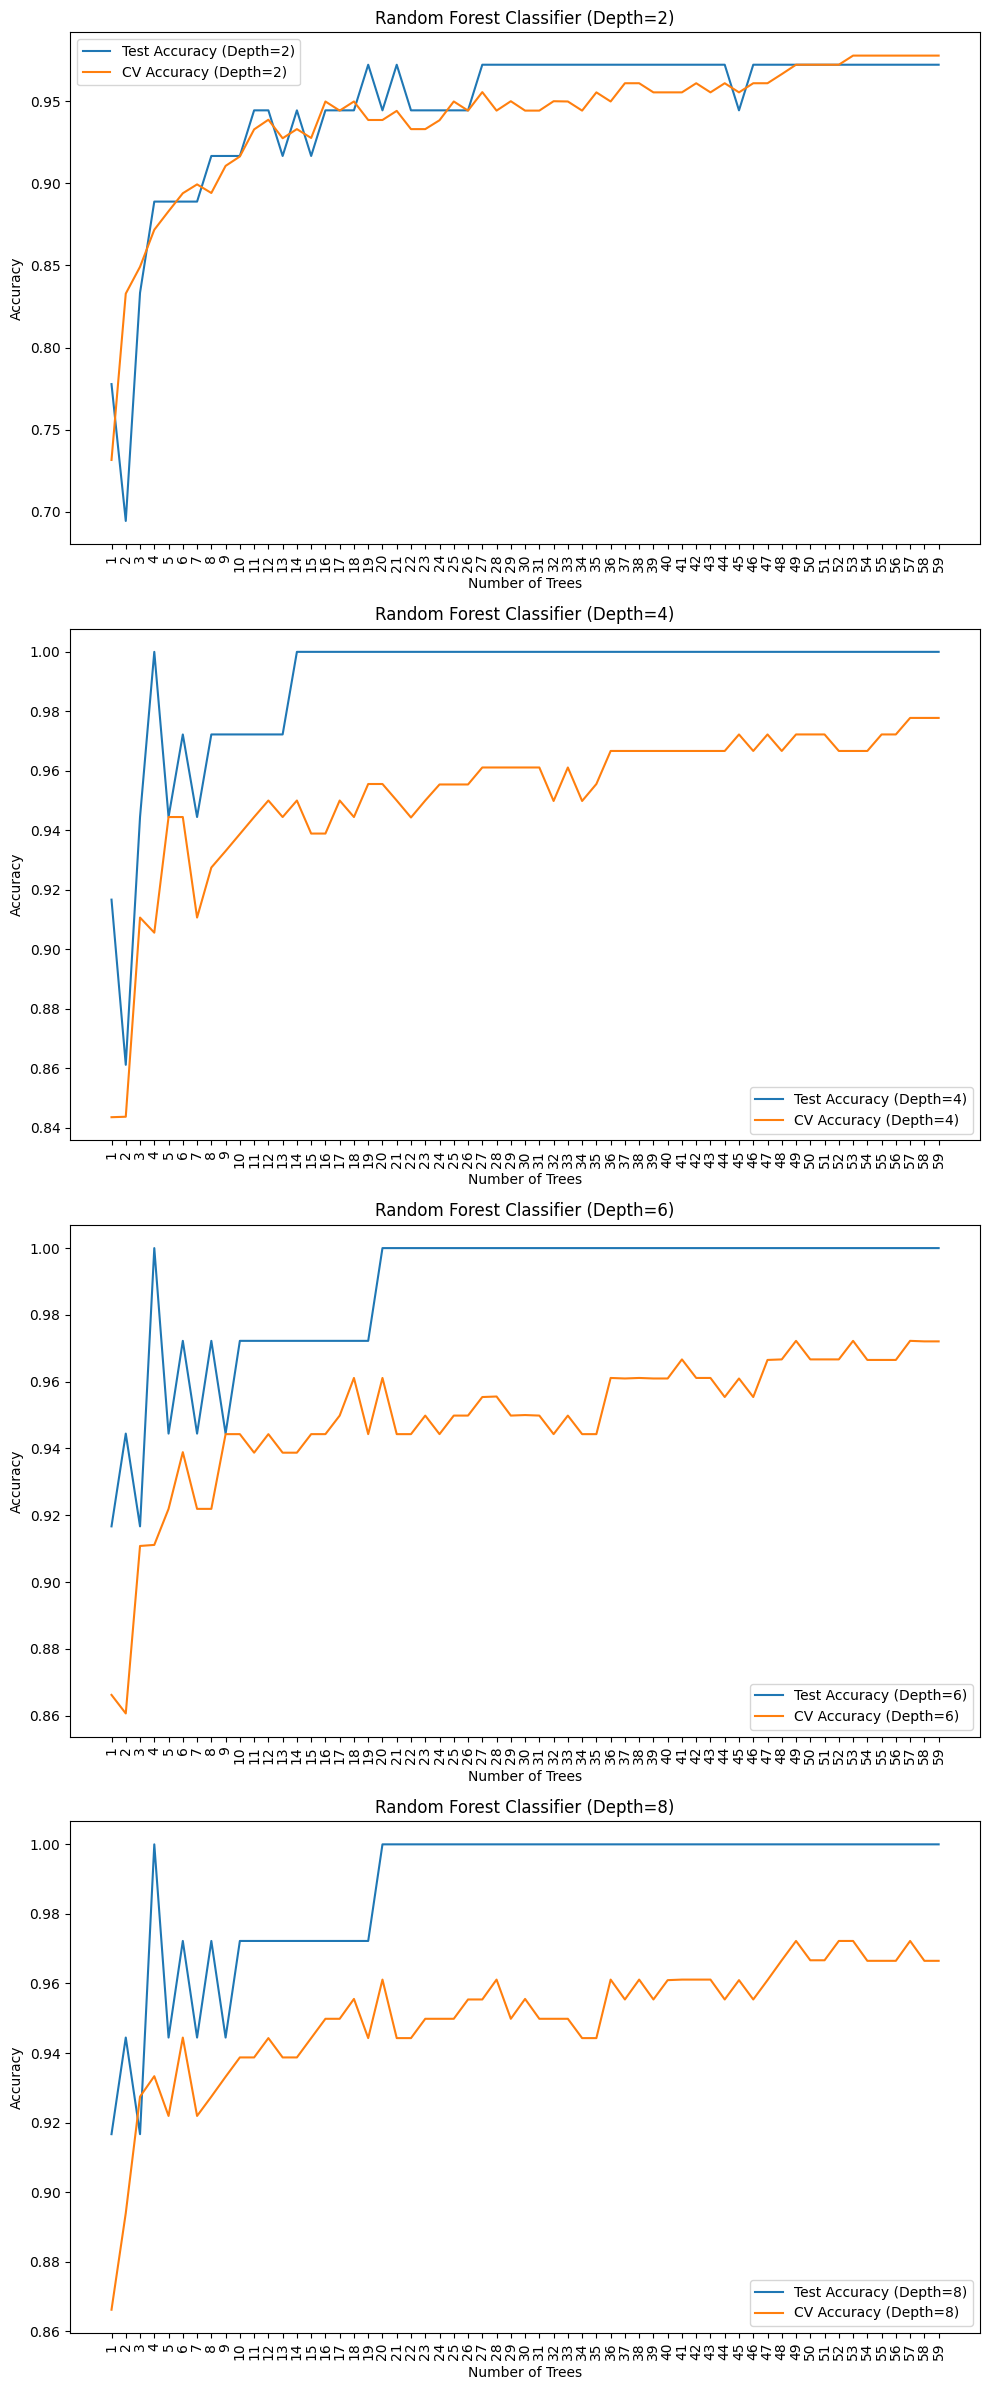

In [143]:
# Исследование зависимости от числа деревьев и глубины дерева
max_depth = [2, 4, 6, 8]
n_estimators_list = range(1, 60)

# Создаем subplot для каждой глубины дерева
fig, axes = plt.subplots(nrows=len(max_depth), ncols=1, figsize=(10, 6 * len(max_depth)))

for i, depth in enumerate(max_depth):
    test_scores_depth = []
    cv_scores_depth = []

    for n_estimators in n_estimators_list:
        # Создание и обучение модели случайного леса
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_estimators, random_state=45)
        model.fit(X_train, y_train)

        # Вычисление точности на тестовом наборе
        test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_scores_depth.append(test_accuracy)

        # Вычисление точности на скользящем контроле (cross-validation)
        cv_accuracy = cross_val_score(model, X, y, cv=5).mean()
        cv_scores_depth.append(cv_accuracy)

    # Визуализация результатов для каждой глубины дерева
    axes[i].plot(n_estimators_list, test_scores_depth, label=f'Test Accuracy (Depth={depth})')
    axes[i].plot(n_estimators_list, cv_scores_depth, label=f'CV Accuracy (Depth={depth})')
    axes[i].set_xticks(n_estimators_list)
    axes[i].set_xticklabels(n_estimators_list, rotation=90)
    axes[i].set_title(f'Random Forest Classifier (Depth={depth})')
    axes[i].set_xlabel('Number of Trees')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Построение деревьев (XGBoost vs SKLearn vs CatBoost)

### XGBoost

XGBoost использует ансамбль деревьев решений для решения задач классификации и регрессии. Каждое дерево строится последовательно, и они объединяются для формирования окончательного предсказания.

1. XGBoost использует CART (Classification and Regression Trees) в качестве базового алгоритма для построения деревьев. Дерево строится рекурсивно путем разделения данных на два подмножества на каждом узле.

2. Определяется функционал потерь, который должен быть минимизирован при построении дерева. В случае задачи регрессии это может быть среднеквадратичная ошибка (Mean Squared Error), а для классификации - логистическая функция потерь.

3. Для управления сложностью дерева и предотвращения переобучения применяется регуляризация. XGBoost включает L1 (Lasso) и L2 (Ridge) регуляризацию.

4. На каждом узле дерева происходит подбор оптимального разделения, которое максимизирует уменьшение функционала потерь. Применяется жадный метод: для каждого признака и каждого возможного порога производится разделение, и выбирается наилучшее.

5. Рассчитываются веса узлов дерева на основе функционала потерь и регуляризации.

6. XGBoost имеет механизм для обработки отсутствующих значений (missing). Он размещает узлы с отсутствующими значениями в том или ином поддереве и вычисляет их веса так, чтобы максимизировать уменьшение функционала потерь.
Обновление весов листьев:

7. Обновление весов листьев происходит на основе градиентного спуска. Он использует градиент функционала потерь по предсказаниям дерева.

8. Полученное дерево добавляется в ансамбль с учетом веса дерева, который может быть настроен в процессе обучения.

Эти шаги повторяются до достижения заданного числа деревьев или до тех пор, пока не будут достигнуты определенные критерии остановки, такие как максимальная глубина дерева или минимальное количество объектов в листьях.

### SKLearn

1. В scikit-learn базовым алгоритмом для градиентного бустинга по умолчанию является дерево решений (DecisionTreeRegressor для задач регрессии и DecisionTreeClassifier для задач классификации).

2. Некоторые из основных параметров, связанных с деревом решений, такие как максимальная глубина (max_depth), минимальное количество объектов в листьях (min_samples_leaf), максимальное количество листьев (max_leaf_nodes), могут быть настроены пользователем.

3. Гиперпараметры градиентного бустинга также включают параметры, связанные с ансамблем, такие как скорость обучения (learning_rate), количество деревьев (n_estimators), а также параметры, контролирующие регуляризацию.

4. Дерево обучается на обучающем наборе данных с использованием текущего градиента функционала потерь. Градиент вычисляется для каждого объекта по текущим предсказаниям ансамбля.

5. Дерево добавляется в ансамбль с некоторым весом, который определяется с использованием оптимизационного алгоритма, например, градиентного спуска.

6. После добавления дерева в ансамбль, предсказания ансамбля обновляются в соответствии с его весом.

7. Этот процесс повторяется заданное количество раз (определено параметром n_estimators - количество деревьев) для создания ансамбля деревьев.

Важно отметить, что каждое новое дерево нацелено на уменьшение остаточных ошибок, которые не были учтены предыдущими деревьями в ансамбле. Этот процесс улучшает прогнозы модели по мере добавления новых деревьев в ансамбль

### CatBoost

CatBoost — это библиотека для градиентного бустинга, оптимизированная для работы с категориальными признаками. Давайте рассмотрим основные этапы построения дерева решений в CatBoost:

Обработка категориальных признаков:

1. Одной из ключевых особенностей CatBoost является его способность обрабатывать категориальные признаки напрямую без предварительного кодирования. CatBoost автоматически обрабатывает категориальные признаки, применяя технику кодирования с использованием встроенного алгоритма, который учитывает статистику встречаемости каждого значения категории в разных частях дерева.

2. CatBoost, как и другие библиотеки для градиентного бустинга, использует ансамбль деревьев. Каждое дерево строится последовательно, и новые деревья добавляются для уменьшения ошибок предыдущих.

3. CatBoost имеет различные гиперпараметры, позволяющие настраивать процесс построения дерева и ансамбля. Некоторые из них включают в себя параметры для контроля глубины дерева, скорости обучения, количества деревьев и т. д.

4. CatBoost также поддерживает регуляризацию для контроля сложности модели и предотвращения переобучения.

5. Каждое дерево обучается на основе текущего градиента функционала потерь. Обучение происходит с учетом всех признаков, включая категориальные, благодаря встроенной обработке категориальных данных.

6. CatBoost автоматически обрабатывает отсутствующие значения, включая их в процесс обучения и управляя ими внутри деревьев.

7. Как только дерево построено, оно добавляется в ансамбль с некоторым весом, учитывающим его вклад в уменьшение функционала потерь.

8. Этот процесс повторяется до достижения заданного количества деревьев или до тех пор, пока не будет достигнуто критерии остановки.

## Краткое сравнение градиентных бустингов XGBoost, SKLearn и CatBoost:

1. Обработка категориальных признаков:
- XGBoost: Требует предварительной обработки категориальных признаков.
- SKLearn: Требует предварительной обработки категориальных признаков.
- CatBoost: Может обрабатывать категориальные признаки напрямую без предварительного кодирования.
2. Обработка отсутствующих значений:
- XGBoost: Требует указания параметра missing для обработки отсутствующих значений.
- SKLearn: Требует предварительной обработки отсутствующих значений.
- CatBoost: Автоматически обрабатывает отсутствующие значения.
3. Скорость обучения:
- XGBoost: Эффективен и имеет параллельную реализацию, но требует настройки параметров.
- SKLearn: Может быть медленнее из-за отсутствия встроенной оптимизации для параллельных вычислений.
- CatBoost: Эффективен и может быть быстрее благодаря встроенным оптимизациям.
4. Регуляризация:
- XGBoost: Поддерживает L1 и L2 регуляризацию.
- SKLearn: Поддерживает регуляризацию через гиперпараметры.
- CatBoost: Имеет свой собственный подход к регуляризации.
5. Автоматическая настройка гиперпараметров:
- XGBoost и SKLearn: Требуют ручной настройки гиперпараметров.
- CatBoost: Предоставляет методы для автоматической настройки гиперпараметров.